In [3]:
import multiprocessing as mp

import numpy as np
import timeit
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns

In [4]:
data_p_vs_s = pd.read_pickle("C:/Users/loram/OneDrive/Desktop/LSE MSc/ST444 Statistical Computing/parallel_Bootstrap-Lora/CompareComplete.pkl")
data_divided = pd.read_pickle("C:/Users/loram/OneDrive/Desktop/LSE MSc/ST444 Statistical Computing/parallel_Bootstrap-Lora/DivPar2.pkl")

## Performance between Serial and Parallel functions 

The following graphs shows the length of time to run the bootstrap for 4 different cases:
    - Serial bootstrap function without numpy
    - Parallelised bootstrap function without numpy
    - Serial bootstrap function with numpy
    - Parallelised bootstrap function with numpy
    
For the parallelised bootstrap functions the input numpy array is transformed into a shared memory array.

### Performance without using Numpy

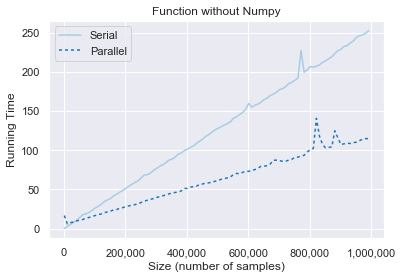

In [16]:
data_wo = data_p_vs_s[["Serial", "Parallel"]]
sns.set(style='darkgrid', palette='Paired')
p = sns.lineplot(data=data_wo, dashes=[(None, None), (2, 2)])
p.legend(labels=['Serial', 'Parallel'])
p.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
p.set(xlabel = 'Size (number of samples)', ylabel = 'Running Time', title = 'Function without Numpy')
plt.show()

### Performance  using Numpy

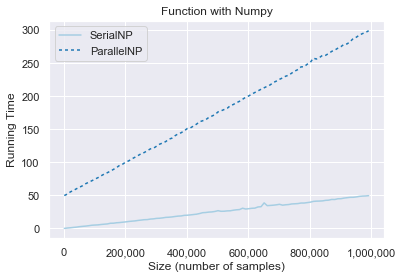

In [12]:
data_w = data_p_vs_s[["SerialNP", "ParallelNP"]]
sns.set(style='darkgrid', palette='Paired')
p = sns.lineplot(data=data_w, dashes=[(None, None), (2, 2)])
p.legend(labels=['SerialNP', 'ParallelNP'])
p.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
p.set(xlabel = 'Size (number of samples)', ylabel = 'Running Time', title = 'Function with Numpy')
plt.show()

### Performance Comparing All

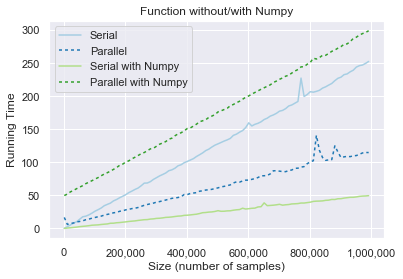

In [5]:
sns.set(style='darkgrid', palette='Paired')
p6 = sns.lineplot(data=data_p_vs_s, dashes=[(None, None), (2, 2), (None, None), (2, 2)])
p6.set(xlabel = 'Size (number of samples)', ylabel = 'Running Time', title = 'Function without/with Numpy')
p6.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
p6.legend(labels=['Serial', 'Parallel', 'Serial with Numpy', 'Parallel with Numpy'])
plt.show()


It seems that for the function without numpy, using parallelization improves the running time, however for the function with numpy it gets considerably worse when using parallelization.

### Using Parallel only on simple functions

Now we look at just at the function with numpy, to try and understand why it gets so much slower after parallelization. The bootstrap function can be split up into two individual functions:
    - taking n samples (the 'sampling' function)
    - calculating the statistic (e.g. np.mean) for the n samples (the 'statistic' function)

For each function we compare 3 different methods:
    1) serial function
    2) parallelised function with normal numpy array
    3) parallelised function with shared memory array (as was done in the previous section)
    
For now we have only looked at functions using numpy and up to sample size 100,000.

In [6]:
data_divided
data_sampling = data_divided[['Sampling', 'SamplingP', 'SamplingPS']]
data_statistic = data_divided[['Statistic', 'StatisticP', 'StatisticPS']]

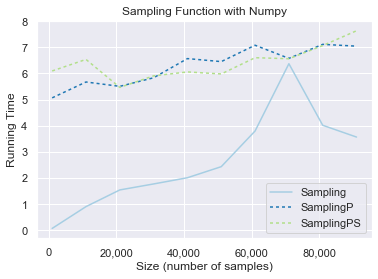

In [10]:
sns.set(style='darkgrid', palette='Paired')
p6 = sns.lineplot(data=data_sampling, dashes=[(None, None), (2, 2), (2, 2)])
p6.set(xlabel = 'Size (number of samples)', ylabel = 'Running Time', title = 'Sampling Function with Numpy')
p6.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
p6.legend(labels=['Sampling', 'SamplingP', 'SamplingPS'])
plt.show()


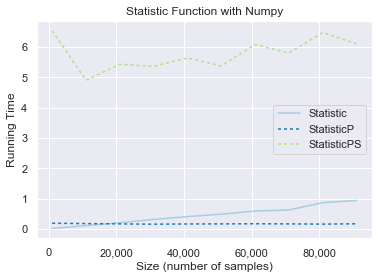

In [11]:
sns.set(style='darkgrid', palette='Paired')
p6 = sns.lineplot(data=data_statistic, dashes=[(None, None), (2, 2), (2, 2)])
p6.set(xlabel = 'Size (number of samples)', ylabel = 'Running Time', title = 'Statistic Function with Numpy')
p6.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
p6.legend(labels=['Statistic', 'StatisticP', 'StatisticPS'])
plt.show()
